# MNIST-Neural Network-Two Hidden Layers with Variable Optimziers

In [8]:
# coding: utf-8
import sys, os
import numpy as np
sys.path.append(os.pardir)

from common.mnist import mnist_data
from common.functions import *
from common.layers import *

### Optimizers

In [10]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.learning_rate * grads[keys]
            
class Momentum:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.learning_rate * grads[key]
            params[key] += self.v[key]

## Multilayer Neural Network Model

In [4]:
import sys, os
from collections import OrderedDict
from scipy import stats
from pandas import DataFrame

class TwoLayerNet2:
    def __init__(self, input_size, hidden_layer1_size, hidden_layer2_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_layer1_size)
        self.params['b1'] = np.zeros(hidden_layer1_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_layer1_size, hidden_layer2_size)
        self.params['b2'] = np.zeros(hidden_layer2_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_layer2_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])

        self.lastLayer = SoftmaxWithCrossEntropyLoss()

        self.optimizer = None
            
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def backpropagation_gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        din = 1
        din = self.lastLayer.backward(din)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            din = layer.backward(din)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db

        return grads
    
    def learning(self, learning_rate, x_batch, t_batch):
        if self.optimizer is None:
            self.optimizer = SGD(learning_rate)
        grads = self.backpropagation_gradient(x_batch, t_batch)
        optimizer.update(params, grads)

## Learning and Validation

In [6]:
import math
mnist = mnist_data("/Users/yhhan/git/aiclass/0.Professor/3.VanillaNN/MNIST_data")

(img_train, label_train), 
(img_validation, label_validation), 
(img_test, label_test) = mnist.load_mnist(flatten=True, normalize=True, one_hot_label=True)

network = TwoLayerNet2(input_size=784, 
                       hidden_layer1_size=128, 
                       hidden_layer2_size=128, 
                       output_size=10)

num_epochs = 50
train_size = img_train.shape[0]
batch_size = 1000
learning_rate = 0.1

train_error_list = []
validation_error_list = []

test_accuracy_list = []
epoch_list = []

num_batch = math.ceil(train_size / batch_size)

for i in range(num_epochs):
    j = 0
    for j in range(num_batch):
        x_batch = img_train[j * batch_size : j * batch_size + batch_size]
        t_batch = label_train[j * batch_size : j * batch_size + batch_size]
        network.learning(learning_rate, x_batch, t_batch)

    epoch_list.append(i)
    
    train_loss = network.loss(x_batch, t_batch)
    train_error_list.append(train_loss)
    
    validation_loss = network.loss(img_validation, label_validation)
    validation_error_list.append(validation_loss)    
    
    test_accuracy = network.accuracy(img_test, label_test)
    test_accuracy_list.append(test_accuracy)       
    
    print("Epoch: {0:5d}, Train Error: {1:7.5f}, Validation Error: {2:7.5f} - Test Accuracy: {3:7.5f}".format(
        i,
        train_loss,
        validation_loss,
        test_accuracy
    ))

Epoch:     0, Train Error: 2.30149, Validation Error: 2.30124 - Test Accuracy: 0.11350
Epoch:     1, Train Error: 2.30023, Validation Error: 2.29985 - Test Accuracy: 0.11350
Epoch:     2, Train Error: 2.29619, Validation Error: 2.29573 - Test Accuracy: 0.11350
Epoch:     3, Train Error: 2.26375, Validation Error: 2.26358 - Test Accuracy: 0.21070
Epoch:     4, Train Error: 2.04147, Validation Error: 2.04683 - Test Accuracy: 0.23630
Epoch:     5, Train Error: 1.49868, Validation Error: 1.49495 - Test Accuracy: 0.50420
Epoch:     6, Train Error: 0.89379, Validation Error: 0.86403 - Test Accuracy: 0.70290
Epoch:     7, Train Error: 0.70011, Validation Error: 0.64780 - Test Accuracy: 0.76810
Epoch:     8, Train Error: 0.61953, Validation Error: 0.56019 - Test Accuracy: 0.80560
Epoch:     9, Train Error: 0.56633, Validation Error: 0.50373 - Test Accuracy: 0.82980
Epoch:    10, Train Error: 0.51905, Validation Error: 0.45423 - Test Accuracy: 0.84790
Epoch:    11, Train Error: 0.47323, Validat

## Analysis with Graph

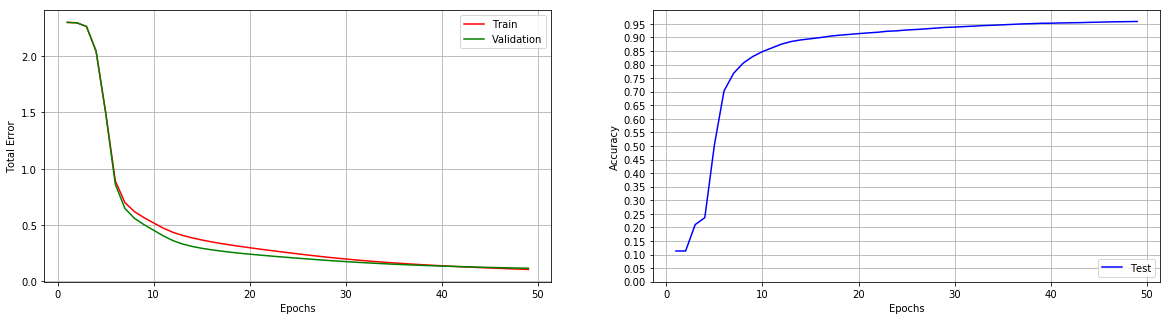

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
Total Test Image: 10000, Number of False Prediction: 412
Test Accuracy: 0.9588
False Prediction Index: 8, Prediction: 6, Ground Truth: 5
False Prediction Index: 59, Prediction: 7, Ground Truth: 5
False Prediction Index: 124, Prediction: 4, Ground Truth: 7
False Prediction Index: 151, Prediction: 8, Ground Truth: 9
False Prediction Index: 233, Prediction: 7, Ground Truth: 8


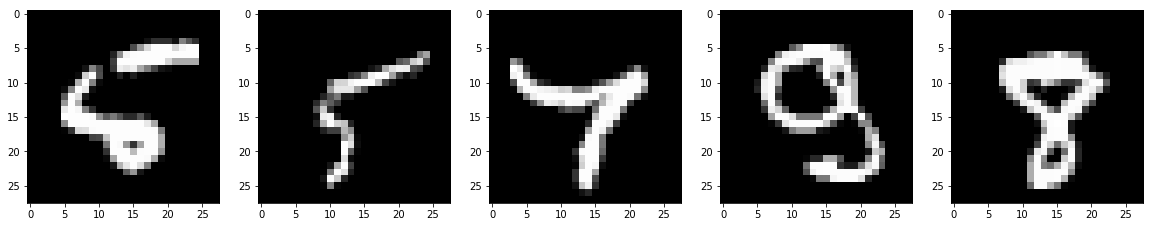

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# Draw Graph about Error Values & Accuracy Values
def draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list):
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list)
    
def draw_false_prediction(diff_index_list):
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(img_test[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')
        
prediction = np.argmax(network.predict(img_test), axis=1)
ground_truth = np.argmax(label_test, axis=1)
        
print(prediction)
print(ground_truth)

diff_index_list = []
for i in range(len(img_test)):
    if (prediction[i] != ground_truth[i]):
        diff_index_list.append(i)

print("Total Test Image: {0}, Number of False Prediction: {1}".format(len(img_test), len(diff_index_list)))
print("Test Accuracy:", float(len(img_test) - len(diff_index_list)) / float(len(img_test)))
draw_false_prediction(diff_index_list)